In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [54]:
rng = np.random.default_rng()

In [55]:
df = pd.read_csv('standings2.csv')
df = df.set_index("Team")
df

,Balancing,Halfpipe,Funnel Endurance,Newton's Cradle,Long Jump,5 Meter Hurdles,Block Pushing,Triathlon,Sand Mogul Race,5m Sprint,Black Hole Funnel,Relay Run,High Jump,Event 14,Event 15,Event 16
Team,,,,,,,,,,,,,,,,
O'rangers,6,25,20,25,4,10,15,15,4,6,10,20,25,NaN,NaN,NaN
Savage Speeders,2,1,15,7,12,15,12,9,12,15,25,25,0,NaN,NaN,NaN
Minty Maniacs,25,15,25,10,8,8,2,6,15,25,0,1,7,NaN,NaN,NaN
Midnight Wisps,15,12,5,11,5,20,25,10,6,5,20,5,4,NaN,NaN,NaN
Crazy Cat's Eyes,11,20,10,12,25,12,9,4,9,4,15,0,5,NaN,NaN,NaN
Team Galactic,1,11,2,20,9,11,11,11,7,9,11,11,12,NaN,NaN,NaN
Raspberry Racers,20,7,7,15,1,25,10,5,5,12,1,12,1,NaN,NaN,NaN
Hazers,9,8,6,9,6,7,0,25,20,11,3,9,3,NaN,NaN,NaN
Team Momo,10,10,0,5,8,4,20,20,10,2,7,10,9,NaN,NaN,NaN


In [56]:
poss_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 25]

In [57]:
# ranks = pd.DataFrame(index = df.index)
# scores = pd.DataFrame(index = df.index)
# firstPlaceHistories = pd.DataFrame(index = df.index)

ranks = pd.read_pickle("ranks.pkl")
scores = pd.read_pickle("scores.pkl") 

In [58]:
# def fillDf(oldDf):
#     filledDf = oldDf.copy()
#     for col in oldDf.columns[oldDf.isna().any()]:
#         rng.shuffle(poss_scores)
#         filledDf[col] = poss_scores
#     filledDf["sum"] = filledDf.sum(axis=1)
#     filledDf["rank"] = filledDf["sum"].rank(ascending=False)
#     return filledDf

In [59]:
# def fillDfEfficient(oldDf, iterations, scoresDf, ranksDf, firstPlaceDf):
#     numColsBlank = len(oldDf.columns[oldDf.isna().any()])
#     numColsFilled = 16 - numColsBlank

#     for i in range(iterations):
#         fillDfOneIteration(oldDf, i, scoresDf, ranksDf, firstPlaceDf, numColsFilled)


In [60]:
# def fillDfOneIteration(oldDf, i, scoresDf, ranksDf, firstPlaceDf, numColsFilled):
#     if i % 100 == 0:
#         print("Iteration", i)

#     filledDf = oldDf.copy()

#     for col in filledDf.columns[numColsFilled:]:
#         rng.shuffle(poss_scores)
#         filledDf[col] = poss_scores
#     scoresDf[i] = filledDf.sum(axis=1)
#     ranksDf[i] = filledDf.sum(axis=1).rank(ascending=False)

#     for colToIgnore in range(numColsFilled, -1, -1):
#         rng.shuffle(poss_scores)
#         filledDf.iloc[:, colToIgnore] = poss_scores
#         scores = filledDf.sum(axis=1)
#         bestTeam = scores.idxmax()
#         firstPlaceDf.loc[bestTeam, colToIgnore] += 1


In [61]:
# ranks = pd.DataFrame(index = df.index)
# scores = pd.DataFrame(index = df.index)
# firstPlaceHistories = pd.DataFrame(index = df.index)

# for colToIgnore in range(numColsFilled + 1):
#     firstPlaceHistories.loc[df.index[0], colToIgnore] = 0

# firstPlaceHistories = firstPlaceHistories.fillna(0)

# iterations = 150000
# fillDfEfficient(df, iterations, scores, ranks, firstPlaceHistories)

In [62]:
# firstPlaceHistories = firstPlaceHistories/iterations

In [63]:
numColsBlank = len(df.columns[df.isna().any()])
numColsFilled = 16 - numColsBlank
numColsFilled

13

In [64]:
# for i in range(50000):
#     if i % 500 == 0:
#         print(i)

#     scenario = fillDf(df)

#     scores[i] = scenario["sum"]
#     ranks[i] = scenario["rank"]

In [65]:
# ranks.to_pickle("ranks.pkl")
# scores.to_pickle("scores.pkl")

In [66]:
ranks

,0,1,2,3,4,5,6,7,8,9,...,749990,749991,749992,749993,749994,749995,749996,749997,749998,749999
Team,,,,,,,,,,,,,,,,,,,,,
O'rangers,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Savage Speeders,2.0,2.0,2.0,6.0,4.0,3.0,3.0,5.0,6.0,2.0,...,4.0,5.0,3.0,3.5,3.0,2.0,4.0,4.0,3.0,7.0
Minty Maniacs,5.0,4.5,3.0,4.0,2.0,3.0,4.0,4.0,4.0,4.0,...,2.0,2.0,4.0,2.0,2.0,6.0,2.0,2.0,2.0,3.5
Midnight Wisps,3.0,4.5,4.0,2.0,6.0,3.0,2.0,6.0,2.0,5.0,...,3.0,6.0,5.0,3.5,4.0,5.0,3.0,5.0,5.0,2.0
Crazy Cat's Eyes,7.5,6.0,6.0,3.0,7.0,6.0,6.0,2.0,3.0,3.0,...,7.0,3.0,2.0,5.0,6.0,4.0,5.0,3.0,6.0,3.5
Team Galactic,4.0,7.0,7.0,7.0,3.0,7.0,7.0,3.0,7.0,10.0,...,8.0,4.0,6.0,8.0,8.0,3.0,6.0,8.0,4.0,6.0
Raspberry Racers,6.0,3.0,5.0,8.0,8.0,9.0,9.0,10.0,8.0,8.0,...,5.5,8.0,8.0,6.0,5.0,8.0,7.0,6.0,7.0,9.0
Hazers,10.0,9.0,9.0,5.0,10.0,5.0,8.0,8.0,5.0,7.0,...,9.0,7.0,7.0,7.0,7.0,9.0,9.0,10.0,10.0,8.0
Team Momo,7.5,8.0,10.0,10.0,5.0,8.0,5.0,9.0,9.0,6.0,...,5.5,9.0,9.0,9.0,10.0,11.0,8.0,7.0,9.0,10.0


O'rangers
Savage Speeders
Minty Maniacs
Midnight Wisps
Crazy Cat's Eyes
Team Galactic
Raspberry Racers
Hazers
Team Momo
Oceanics
Bumblebees
Green Ducks
Balls of Chaos
Thunderbolts
Hornets
Mellow Yellow


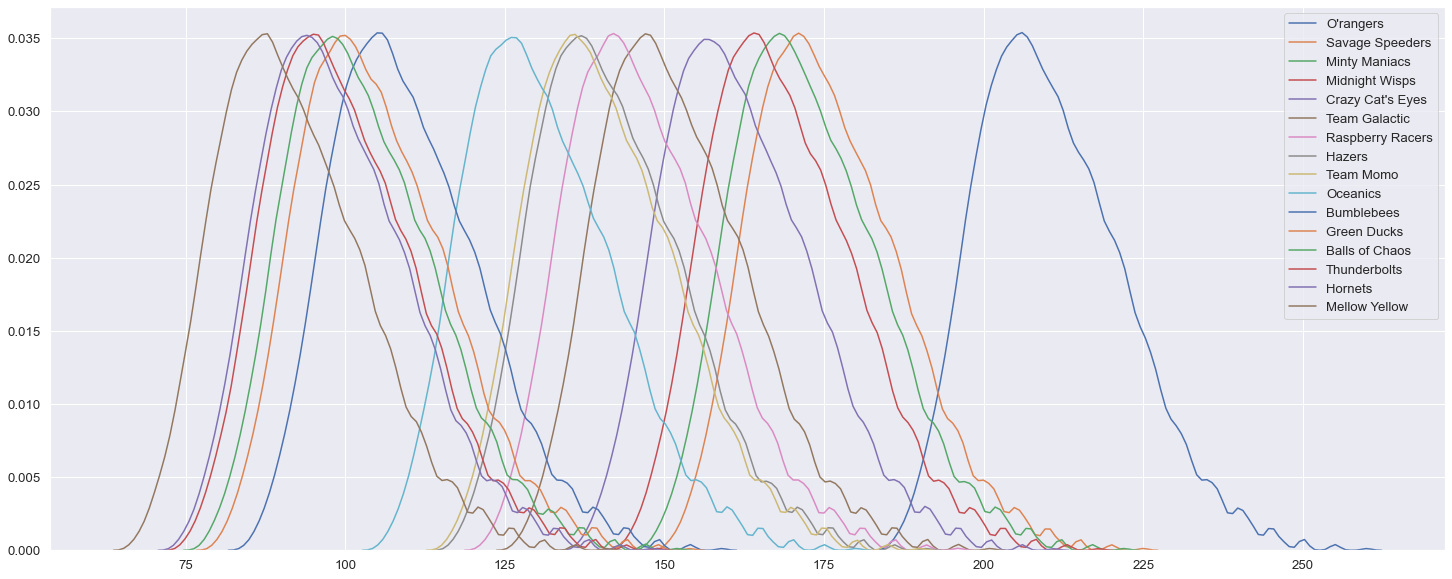

In [67]:
plt.figure(figsize=(25,10))
for idx, row in scores.iterrows():
    print(idx)
    sns.kdeplot(row, label = idx)
plt.legend()
plt.savefig("scores_hist.png")
plt.show()

In [68]:
# plt.figure(figsize=(25,10))
# for idx, row in ranks.iterrows():
#     print(idx)
#     sns.distplot(row, label = idx, kde = False, bins = range(1,18))
# plt.legend()
# plt.savefig("ranks_hist.png")
# plt.show()

In [69]:

# rankCounts = pd.DataFrame(df["Team"])
# rankCounts = rankCounts.set_index("Team")
# for i in range(1, 17):
#     print(i)
#     rankCounts[str(i)] = ranks[(i <= ranks) & (ranks < i+1)].count(axis = 1)
# rankCounts


In [70]:
# sns.set()
# plt.figure(figsize=(25,15))
# rankCounts2 = rankCounts2/500
# sns.heatmap(rankCounts2, annot = True)
# plt.show()

In [71]:
rankHeatmap = pd.DataFrame(index = df.index)
for idx, row in ranks.iterrows():
    counts = row.value_counts(normalize = True)
    for i in range(1, 17):
        rankHeatmap.loc[idx, i] = counts[(counts.index >= i) & (counts.index < i+1)].sum()
rankHeatmap

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Team,,,,,,,,,,,,,,,,
O'rangers,0.964408,0.034547,0.001041,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Savage Speeders,0.020233,0.376876,0.281743,0.188871,0.095436,0.030705,0.005568,0.000540,0.000028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Minty Maniacs,0.012657,0.284892,0.274021,0.221423,0.136604,0.054429,0.013969,0.001877,0.000125,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Midnight Wisps,0.006472,0.193277,0.224667,0.236308,0.192396,0.102553,0.035795,0.007695,0.000812,0.000025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Crazy Cat's Eyes,0.001785,0.091655,0.133977,0.176023,0.235007,0.197079,0.111708,0.042207,0.009709,0.000845,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000
Team Galactic,0.000191,0.025433,0.048515,0.080624,0.134063,0.214656,0.222309,0.164880,0.085940,0.022240,0.001136,0.000013,0.000000,0.000000,0.000000,0.000000
Raspberry Racers,0.000043,0.012424,0.026331,0.048101,0.088632,0.158200,0.214833,0.217512,0.162591,0.064937,0.006171,0.000224,0.000001,0.000000,0.000000,0.000000
Hazers,0.000008,0.005401,0.013531,0.026828,0.053601,0.107367,0.165107,0.218040,0.240116,0.144795,0.023241,0.001907,0.000057,0.000001,0.000000,0.000000
Team Momo,0.000005,0.004627,0.011776,0.023444,0.048588,0.098065,0.155820,0.210172,0.249856,0.165420,0.029529,0.002596,0.000099,0.000003,0.000000,0.000000


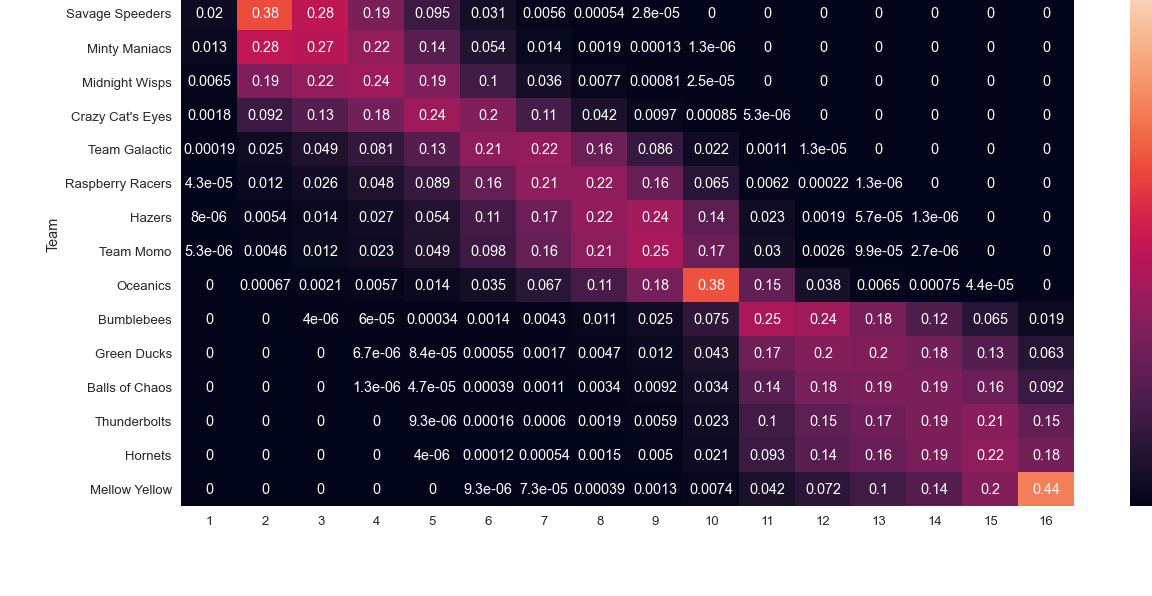

In [79]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.2)
plt.title("Heatmap of Placement Probabilities")
plt.xlabel("Rank")
sns.heatmap(rankHeatmap, annot = True, vmax = 0.5)
plt.savefig("rankHeatmap.png", dpi = 200, facecolor = 'white', transparent = False)
plt.show()

In [73]:
# def fillDfFixed(oldDf, colsToLeave):
#     filledDf = oldDf.copy()
#     for col in oldDf.columns[colsToLeave:]:
#         rng.shuffle(poss_scores)
#         filledDf[col] = poss_scores
#     filledDf["sum"] = filledDf.sum(axis=1)
#     filledDf["rank"] = filledDf["sum"].rank(ascending=False)
#     return filledDf

In [74]:
# firstPlaceHistories = pd.DataFrame(index = df.index)
# for eventsToIgnore in range(0, numColsFilled + 1):
#     ranks = pd.DataFrame(index = df.index)
#     print(f"Keeping {eventsToIgnore} event(s)")

#     for i in range(25000):
#         if i % 500 == 0:
#             print(i)
#         scenario = fillDfFixed(df, eventsToIgnore)
#         ranks[i] = scenario["rank"]
    
#     for idx, row in ranks.iterrows():
#         counts = row.value_counts(normalize = True)
#         firstPlaceHistories.loc[idx, eventsToIgnore] = counts[counts.index < 2].sum()




In [75]:
# print(colorDict)
colorDict = {
    'Minty Maniacs': "#429e9d",
    "O'rangers": "#fd6a02",
    "Crazy Cat's Eyes": "green",
    'Raspberry Racers': "#e30b5d",
    'Midnight Wisps': "#02075d",
    'Team Galactic': "#7F00FF",
    'Savage Speeders': "#800000",
    'Balls of Chaos': "#cc7722",
    'Hazers': "grey",
    'Bumblebees': "#f1b82d",
    'Team Momo': "#1C004D",
    'Green Ducks': "#228c22",
    'Thunderbolts': "blue",
    'Hornets': "#9acd32",
    'Oceanics': "#265b5f",
    'Mellow Yellow': "#ffd300"
}

firstPlaceHistories = pd.read_pickle("firstPlace.pkl")

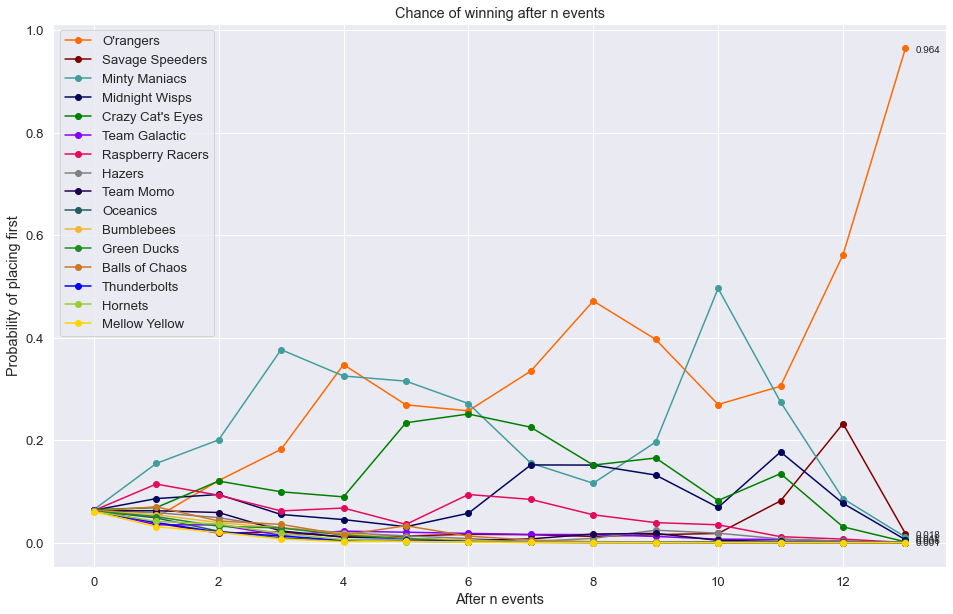

In [76]:
plt.figure(figsize = (16, 10))
sns.set(font_scale=1.2)
# colorDict = {}
for idx, row in firstPlaceHistories.iterrows():
    # colorDict[idx] = "#000000"
    plt.plot(range(numColsFilled + 1), row, label = idx, marker = 'o', color = colorDict[idx])
for idx, row in list(firstPlaceHistories.iterrows())[:5]:
    plt.annotate(round(row[numColsFilled], 3), (numColsFilled, row[numColsFilled]), ha="left", textcoords="offset points", xytext=(10,-4), fontsize = 'x-small')
plt.title("Chance of winning after n events")
plt.ylabel("Probability of placing first")
plt.xlabel("After n events")
plt.legend()
plt.savefig("rankHistory.png", dpi = 200)
plt.show()

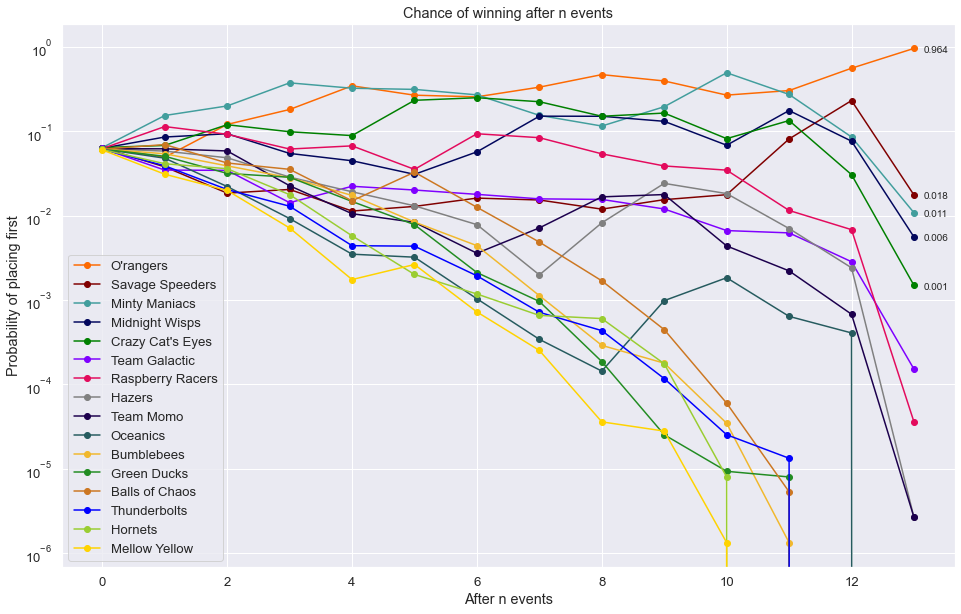

In [77]:
plt.figure(figsize = (16, 10))
plt.yscale("log")
sns.set(font_scale=1.2)
# colorDict = {}
for idx, row in firstPlaceHistories.iterrows():
    # colorDict[idx] = "#000000"
    plt.plot(range(numColsFilled + 1), row, label = idx, marker = 'o', color = colorDict[idx])
for idx, row in list(firstPlaceHistories.iterrows())[:5]:
    plt.annotate(round(row[numColsFilled], 3), (numColsFilled, row[numColsFilled]), ha="left", textcoords="offset points", xytext=(10,-4), fontsize = 'x-small')
plt.title("Chance of winning after n events")
plt.ylabel("Probability of placing first")
plt.xlabel("After n events")
plt.legend()
plt.savefig("rankHistoryLog.png", dpi = 200)
plt.show()

In [78]:
# g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5)

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "x")

# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)